In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Cultivos

file_names = [f for f in os.listdir('./data_agricola') if f.endswith ('.csv')]
tables = [pd.read_csv(os.path.join('./data_agricola', f), encoding = "ISO-8859-1", low_memory=False) for f in file_names]
data1_cul = pd.concat(tables, axis = 0)
data2_cul = data1_cul.rename(columns={'Anio':'anio',
                              'Idestado':'clave_entidad',
                              'Nomestado':'entidad',
                              'Idmunicipio':'clave_municipio',
                              'Nommunicipio':'municipio',
                              'Nomcultivo':'cultivo',
                              'Sembrada':'superficie_sembrada_ha',
                              'Volumenproduccion':'produccion_ton',
                              'Valorproduccion':'valor_produccion'})
data3_cul = data2_cul[['anio', 'clave_entidad', 'entidad', 'clave_municipio', 'municipio', 'cultivo', 'produccion_ton',
                       'superficie_sembrada_ha', 'valor_produccion']]
data4_cul = data3_cul.loc[(data3_cul.cultivo == 'Maíz grano') | (data3_cul.cultivo == 'Algodón hueso') | (data3_cul.cultivo == 'Naranja')]

dataset1_cul = pd.DataFrame(data4_cul)
dataset1_cul['anio'] = dataset1_cul['anio'].astype(str)
dataset1_cul['clave_entidad'] = dataset1_cul['clave_entidad'].astype(str).str.zfill(2)
dataset1_cul['clave_municipio'] = dataset1_cul['clave_municipio'].astype(str).str.zfill(3)
dataset1_cul['clave_municipio'] = dataset1_cul['clave_entidad'] + dataset1_cul['clave_municipio']
dataset2_cul = dataset1_cul.groupby(['anio', 'clave_entidad', 'entidad', 'cultivo'], as_index=False).sum()
dataset2_cul['rendimiento'] = dataset2_cul['produccion_ton']/dataset2_cul['superficie_sembrada_ha']
dataset2_cul['precio_ton'] = dataset2_cul['valor_produccion']/dataset2_cul['produccion_ton']

dataset_cul = dataset2_cul[['anio', 'clave_entidad', 'entidad', 'cultivo', 'produccion_ton', 'superficie_sembrada_ha',
                            'rendimiento','precio_ton']]
dataset_cul

,anio,clave_entidad,entidad,cultivo,produccion_ton,superficie_sembrada_ha,rendimiento,precio_ton
0,2015,01,Aguascalientes,Maíz grano,60309.42,37209.50,1.620807,3371.589253
1,2015,01,Aguascalientes,Naranja,14.00,2.00,7.000000,2200.000000
2,2015,02,Baja California,Algodón hueso,93432.24,18957.00,4.928641,7350.590000
3,2015,02,Baja California,Maíz grano,1779.46,368.00,4.835489,3907.743804
4,2015,02,Baja California,Naranja,3260.35,265.50,12.280038,3481.529848
...,...,...,...,...,...,...,...,...
254,2018,30,Veracruz,Maíz grano,1234572.12,570418.00,2.164329,4050.934012
255,2018,30,Veracruz,Naranja,2508486.48,169531.00,14.796624,1876.276161
256,2018,31,Yucatán,Maíz grano,124858.07,114727.72,1.088299,4180.296029
257,2018,31,Yucatán,Naranja,148344.59,11661.86,12.720491,2499.291576


In [3]:
#Población

data1_pob = pd.read_csv('poblacion_municipal_2015-2030.csv', encoding = "ISO-8859-1", low_memory=False)
data2_pob = data1_pob.rename(columns={'Año':'anio',
                              'Clave Entidad':'clave_entidad',
                              'Entidad':'entidad',
                              'Clave Municipio':'clave_municipio',
                              'Municipio':'municipio',
                              'Género':'genero',
                              'Rango de edad':'rango_edad',
                              'Población':'poblacion'})
dataset1_pob = pd.DataFrame(data2_pob)
dataset1_pob['anio'] = dataset1_pob['anio'].astype(str)
dataset1_pob['clave_entidad'] = dataset1_pob['clave_entidad'].astype(str).str.zfill(2)
dataset1_pob['clave_municipio'] = dataset1_pob['clave_municipio'].astype(str).str.zfill(3)
dataset2_pob = dataset1_pob.loc[(dataset1_pob.anio == '2015') | (dataset1_pob.anio == '2016') | (dataset1_pob.anio == '2017') | (dataset1_pob.anio == '2018')]

dataset_pob = dataset2_pob.groupby(['anio', 'clave_entidad', 'entidad'], as_index=False).sum()
dataset_pob

,anio,clave_entidad,entidad,poblacion
0,2015,01,Aguascalientes,1331825
1,2015,02,Baja California,3357794
2,2015,03,Baja California Sur,719846
3,2015,04,Campeche,916832
4,2015,05,Coahuila,3000556
...,...,...,...,...
123,2018,28,Tamaulipas,3590486
124,2018,29,Tlaxcala,1329788
125,2018,30,Veracruz,8323640
126,2018,31,Yucatán,2208236


In [4]:
#Temperatura

data1_temp = pd.read_csv('temperatura_promedio_1985-2018.csv', encoding = "ISO-8859-1", low_memory=False)
data2_temp = data1_temp.rename(columns={'Año':'anio',
                             'Clave Entidad':'clave_entidad',
                             'Entidad':'entidad',
                             'Anual':'temperatura_promedio_anual'})
data3_temp = data2_temp[['anio', 'clave_entidad', 'entidad', 'temperatura_promedio_anual']]
dataset1_temp = pd.DataFrame(data3_temp)
dataset1_temp['anio'] = dataset1_temp['anio'].astype(str)
dataset1_temp['clave_entidad'] = dataset1_temp['clave_entidad'].fillna(0)
dataset1_temp['clave_entidad'] = dataset1_temp['clave_entidad'].astype(int)
dataset1_temp['clave_entidad'] = dataset1_temp['clave_entidad'].astype(str).str.zfill(2)
dataset1_temp['temperatura_promedio_anual'] = dataset1_temp['temperatura_promedio_anual'].fillna(0)

dataset_temp = dataset1_temp.loc[(dataset1_temp.anio == '2015') | (dataset1_temp.anio == '2016') | (dataset1_temp.anio == '2017') | (dataset1_temp.anio == '2018')]
dataset_temp

,anio,clave_entidad,entidad,temperatura_promedio_anual
24,2015,01,Aguascalientes,17.700000
25,2016,01,Aguascalientes,18.475000
26,2017,01,Aguascalientes,18.308333
33,2018,01,Aguascalientes,0.000000
58,2015,02,Baja California,20.900000
...,...,...,...,...
1087,2018,31,Yucatán,0.000000
1112,2015,32,Zacatecas,17.400000
1113,2016,32,Zacatecas,17.400000
1114,2017,32,Zacatecas,17.891667


In [5]:
#Unir datasets

merge1_1 = pd.merge(dataset_cul, dataset_pob, left_on=('anio', 'clave_entidad'), right_on=('anio', 'clave_entidad'))
merge1_2 = merge1_1.rename(columns={'entidad_x':'entidad'})
merge1 = merge1_2[['anio', 'clave_entidad', 'entidad', 'cultivo', 'produccion_ton', 'superficie_sembrada_ha', 'rendimiento', 'precio_ton', 'poblacion']]

merge2_1 = pd.merge(merge1, dataset_temp, left_on=('anio', 'clave_entidad'), right_on=('anio', 'clave_entidad'))
merge2_2 = merge2_1.rename(columns={'entidad_x':'entidad'})
merge = merge2_2[['anio', 'clave_entidad', 'entidad', 'cultivo', 'produccion_ton', 'superficie_sembrada_ha', 'rendimiento', 'precio_ton', 'poblacion', 'temperatura_promedio_anual']]

data = merge
data

,anio,clave_entidad,entidad,cultivo,produccion_ton,superficie_sembrada_ha,rendimiento,precio_ton,poblacion,temperatura_promedio_anual
0,2015,01,Aguascalientes,Maíz grano,60309.42,37209.50,1.620807,3371.589253,1331825,17.7
1,2015,01,Aguascalientes,Naranja,14.00,2.00,7.000000,2200.000000,1331825,17.7
2,2015,02,Baja California,Algodón hueso,93432.24,18957.00,4.928641,7350.590000,3357794,20.9
3,2015,02,Baja California,Maíz grano,1779.46,368.00,4.835489,3907.743804,3357794,20.9
4,2015,02,Baja California,Naranja,3260.35,265.50,12.280038,3481.529848,3357794,20.9
...,...,...,...,...,...,...,...,...,...,...
254,2018,30,Veracruz,Maíz grano,1234572.12,570418.00,2.164329,4050.934012,8323640,0.0
255,2018,30,Veracruz,Naranja,2508486.48,169531.00,14.796624,1876.276161,8323640,0.0
256,2018,31,Yucatán,Maíz grano,124858.07,114727.72,1.088299,4180.296029,2208236,0.0
257,2018,31,Yucatán,Naranja,148344.59,11661.86,12.720491,2499.291576,2208236,0.0


In [ ]:
#Correlación Producción-Población

In [10]:
data.produccion_ton.corr(data.poblacion)

0.30848837754820413

In [12]:
data.loc[(data.anio == '2015')].produccion_ton.corr(data.poblacion)

0.3225458596415263

In [13]:
data.loc[(data.anio == '2016')].produccion_ton.corr(data.poblacion)

0.3086216488584595

In [14]:
data.loc[(data.anio == '2017')].produccion_ton.corr(data.poblacion)

0.3062109694442557

In [15]:
data.loc[(data.anio == '2018')].produccion_ton.corr(data.poblacion)

0.29837173403683603

In [ ]:
#Correlación Producción-Temperatura

In [7]:
data.produccion_ton.corr(data.temperatura_promedio_anual)

-0.017104083727403428

In [17]:
data.loc[(data.anio == '2015')].produccion_ton.corr(data.temperatura_promedio_anual)

-0.03604459230534466

In [18]:
data.loc[(data.anio == '2016')].produccion_ton.corr(data.temperatura_promedio_anual)

-0.020163730302084994

In [19]:
data.loc[(data.anio == '2017')].produccion_ton.corr(data.temperatura_promedio_anual)

-0.04004482173680197

In [20]:
data.loc[(data.anio == '2018')].produccion_ton.corr(data.temperatura_promedio_anual)

nan

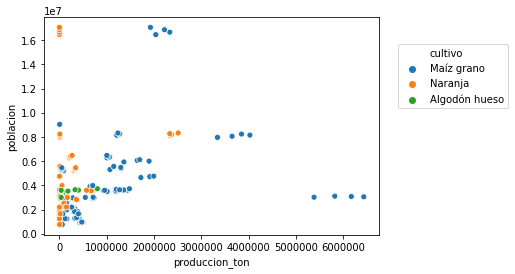

In [27]:
#Correlación Producción-Población
sns.scatterplot(x='produccion_ton', y='poblacion', hue='cultivo', data=data).legend(loc=1, ncol=1, bbox_to_anchor=(1.4, 0.9))

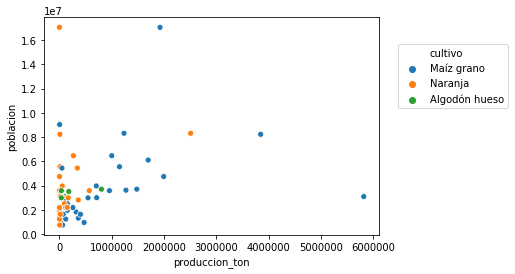

In [26]:
#Correlación Producción-Población 2018
sns.scatterplot(x='produccion_ton', y='poblacion', hue='cultivo', data=data.loc[(data.anio == '2018')]).legend(loc=1, ncol=1, bbox_to_anchor=(1.4, 0.9))

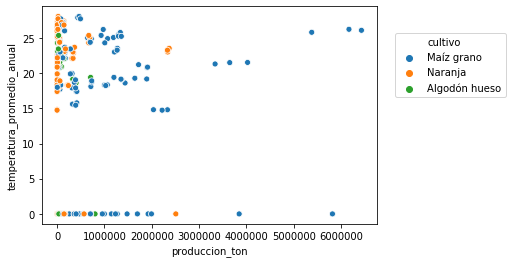

In [24]:
#Correlación Producción-Temperatura
sns.scatterplot(x='produccion_ton', y='temperatura_promedio_anual', hue='cultivo', data=data).legend(loc=1, ncol=1, bbox_to_anchor=(1.4, 0.9))

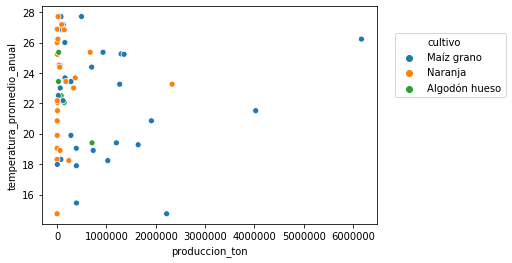

In [29]:
#Correlación Producción-Temperatura 2017
sns.scatterplot(x='produccion_ton', y='temperatura_promedio_anual', hue='cultivo', data=data.loc[(data.anio == '2017')]).legend(loc=1, ncol=1, bbox_to_anchor=(1.4, 0.9))